## Subject 2: Purchasing power of English workers from the 16th to the 19th century

### Libraries

In [2]:
library(ggplot2)

### Data acquisition

In [3]:
data = read.csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv")

# Experiments Reproduction

In [5]:
fillpoly <- function(x,y, low=min(y),  ...) {
    n <- length(x)
    polygon( c(x, x[n], x[1]), c(y, low, low), ...)
}

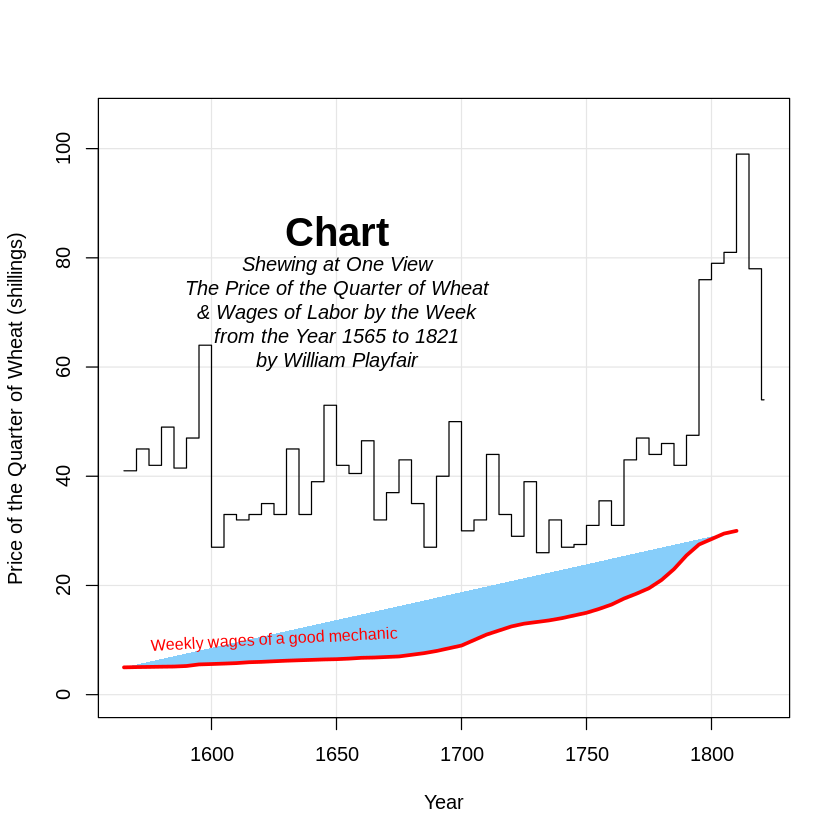

In [12]:
with(data, {
    plot(Year, Wheat, type="s", ylim=c(0,105), 
        ylab="Price of the Quarter of Wheat (shillings)", 
        panel.first=grid(col=gray(.9), lty=1))
    fillpoly(Year, Wages, low=0, col="lightskyblue", border=NA)
    lines(Year, Wages, lwd=3, col="red")
})
text(1625,10, "Weekly wages of a good mechanic", cex=0.8, srt=3, col="red")

text(1650, 85, "Chart", cex=2, font=2)
text(1650, 70, 
	paste("Shewing at One View", 
        "The Price of the Quarter of Wheat", 
        "& Wages of Labor by the Week", 
        "from the Year 1565 to 1821",
        "by William Playfair",
        sep="\n"), font=3)

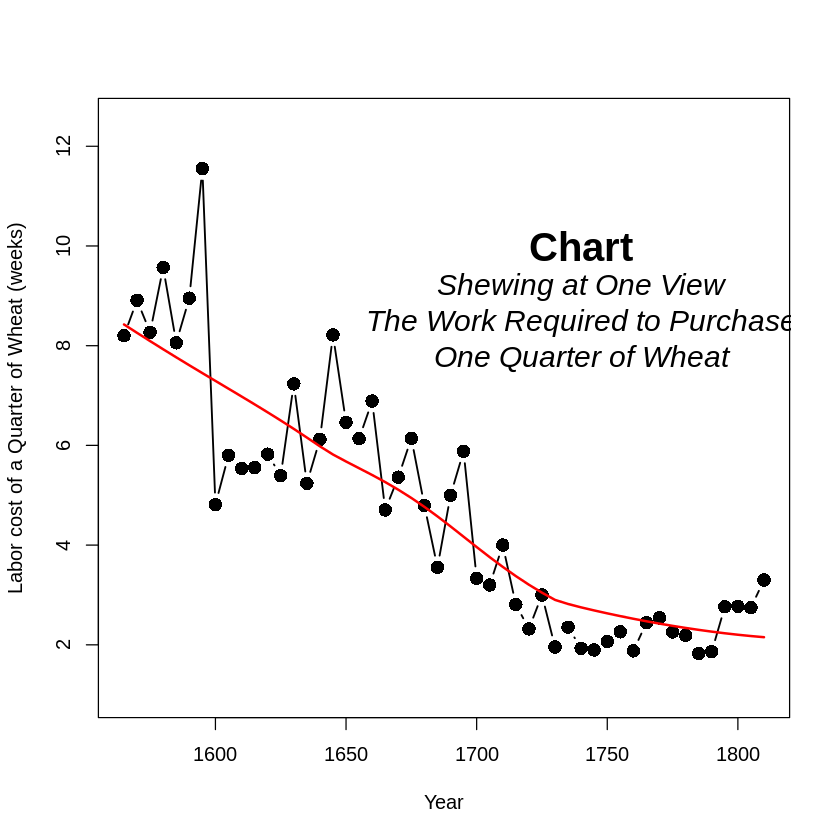

In [16]:
data1 <- within(na.omit(data), {Labor=Wheat/Wages})
with(data1, {
	plot(Year, Labor, type='b', pch=16, cex=1.5, lwd=1.5, 
	     ylab="Labor cost of a Quarter of Wheat (weeks)",
	     ylim=c(1,12.5));
	lines(lowess(Year, Labor), col="red", lwd=2)
	})

text(1740, 10, "Chart", cex=2, font=2)
text(1740, 8.5, 
	paste("Shewing at One View", 
        "The Work Required to Purchase", 
        "One Quarter of Wheat", 
        sep="\n"), cex=1.5, font=3)

# Plot Enhancement

### Cleaning of Data

In [24]:
data = data[!is.na(data$Wages), ]

## Axis correction

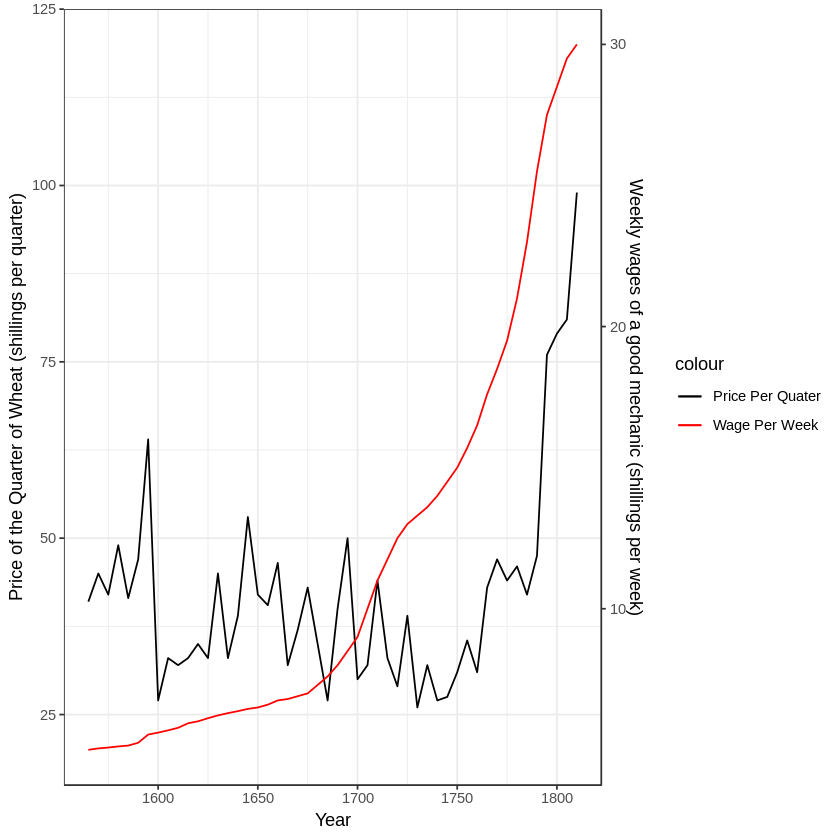

In [62]:
coef = 4

ggplot(data, aes(x=Year)) + 
geom_line(aes(y=Wheat, colour="Price Per Quater")) + 
geom_line(aes(y=Wages * coef, colour="Wage Per Week")) + 
scale_y_continuous(sec.axis= sec_axis(~./coef, name="Weekly wages of a good mechanic (shillings per week)")) +
scale_colour_manual(values = c('black', 'red')) + 
labs(y="Price of the Quarter of Wheat (shillings per quarter)") + 
theme_bw() 

## Trend of the workers' purchase power

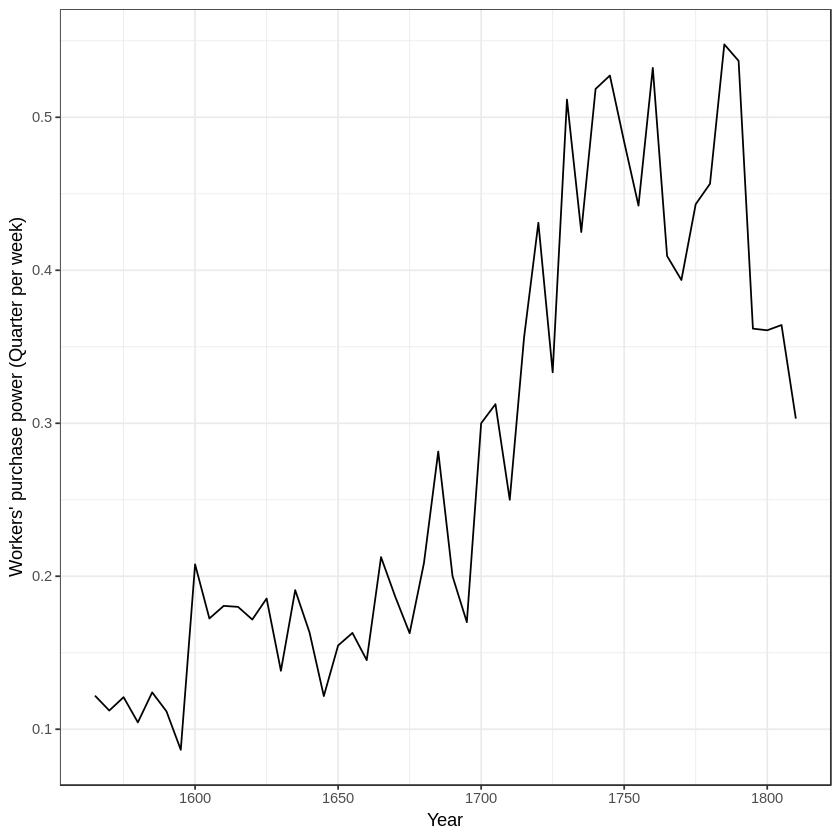

In [65]:
ggplot(data, aes(x=Year)) + 
geom_line(aes(y=Wages/Wheat)) + 
theme_bw() + 
labs(y="Workers' purchase power (Quarter per week)")

From the previous curve, the number of quarters the workers can buy with their week wages significantly increase over the time however, a noticeable fall is reported from 1775 to 1800

**Which plot seems to be clear**

The most clearest one is the plot of the amount of the quarters acquirable workers in a week over the time.

* The plot representing the wheat and wage on two different axis is not insightful enough to capture the rate of the variance of the two analyzed quantities to draw out the augmentation over the time of the purchase power. On the other hand, the ratio between the wheat and wages is much more expressive and directly grasp the gap between the two trend of the studied quantities.